In [1]:
%matplotlib inline


# Single Word

Make a word cloud with a single word that's repeated.


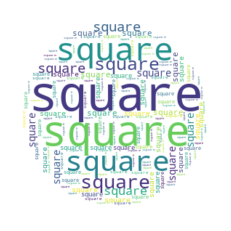

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "square"

x, y = np.ogrid[:300, :300]

# 定义一个圆心为(150,150)，半径为130的圆，使得我们的mask形状是一个圆
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# 设置repeat参数，Make a word cloud with a single word that's repeated.
wc = WordCloud(background_color="white", repeat=True, mask=mask)
# 生成词云
wc.generate(text)

plt.axis("off")
# 采用双线性插值的方法显示颜色
plt.imshow(wc, interpolation="bilinear")
plt.show()


# Create wordcloud with Arabic
Generating a wordcloud from Arabic text

Dependencies:
- bidi.algorithm
- arabic_reshaper

Dependencies installation:
pip install python-bidi arabic_reshaper


In [3]:
pip install python-bidi arabic_reshaper

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import codecs
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

# get data directory (using getcwd() is needed to support running example in generated IPython notebook) 得到当前地址
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
f = codecs.open(os.path.join(d, 'arabicwords.txt'), 'r', 'utf-8')

# Make text readable for a non-Arabic library like wordcloud
text = arabic_reshaper.reshape(f.read())
text = get_display(text)

# Generate a word cloud image
wordcloud = WordCloud(font_path='fonts/NotoNaskhArabic/NotoNaskhArabic-Regular.ttf').generate(text)

# Export to an image
wordcloud.to_file("arabic_example.png")

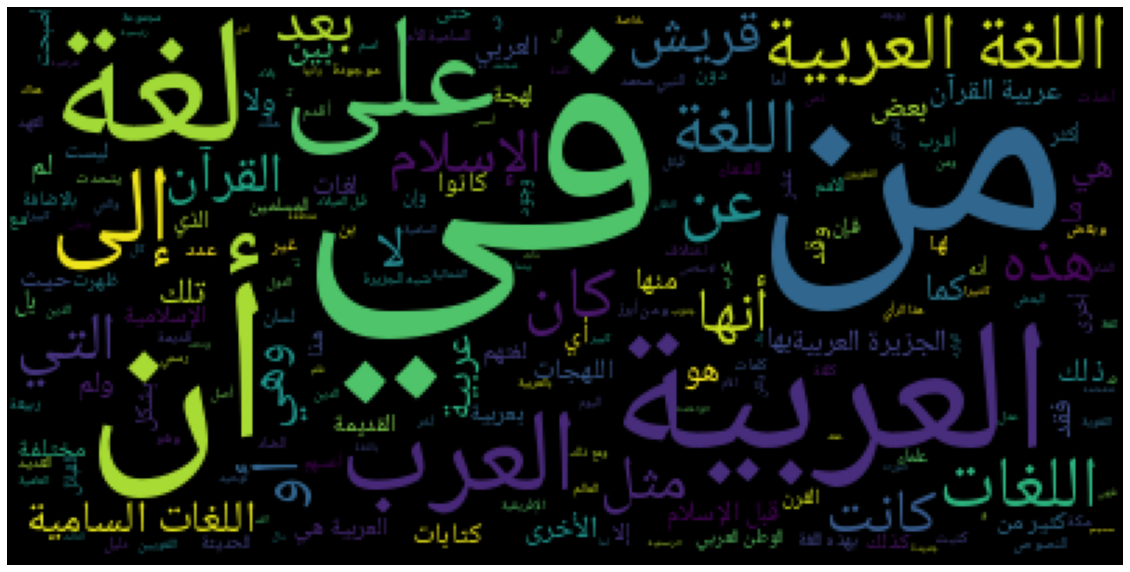

In [5]:
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

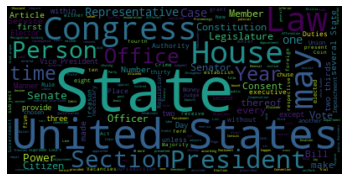

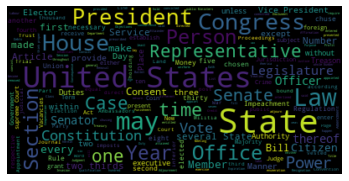

In [6]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'constitution.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

# Masked wordcloud
Using a mask you can generate wordclouds in arbitrary shapes.


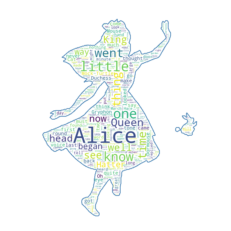

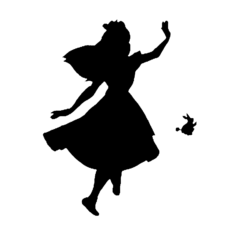

In [7]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# Using frequency
Using a dictionary of word frequency.

In [8]:
pip install multidict

Note: you may need to restart the kernel to use updated packages.


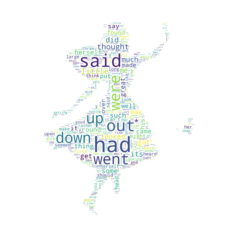

In [9]:
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def makeImage(text):
    alice_mask = np.array(Image.open("alice_mask.png"))

    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, 'alice.txt'), encoding='utf-8')
text = text.read()
makeImage(getFrequencyDictForText(text))

# Image-colored wordcloud
You can color a word-cloud by using an image-based coloring strategy implemented in ImageColorGenerator. It uses the average color of the region occupied by the word in a source image. You can combine this with masking - pure-white will be interpreted as ‘don’t occupy’ by the WordCloud object when passed as mask. If you want white as a legal color, you can just pass a different image to “mask”, but make sure the image shapes line up.

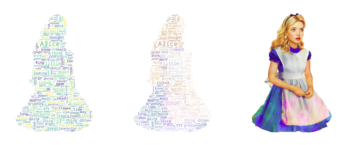

In [10]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'alice.txt')).read()

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open(path.join(d, "alice_color.png")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

# Emoji Example
A simple example that shows how to include emoji. Note that this example does not seem to work on OS X, but does work correctly in Ubuntu.

There are 3 important steps to follow to include emoji: 1) Read the text input with io.open instead of the built in open. This ensures that it is loaded as UTF-8 2) Override the regular expression used by word cloud to parse the text into words. The default expression will only match ascii words 3) Override the default font to something that supports emoji. The included Symbola font includes black and white outlines for most emoji. There are currently issues with the PIL/Pillow library that seem to prevent it from functioning correctly on OS X (https://github.com/python-pillow/Pillow/issues/1774), so try this on ubuntu if you are having problems.

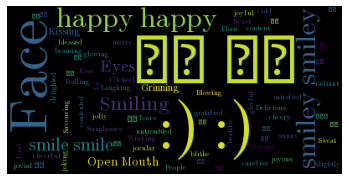

In [11]:
import io
import os
import string
from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# It is important to use io.open to correctly load the file as UTF-8
text = io.open(path.join(d, 'happy-emoji.txt')).read()

# the regex used to detect words is a combination of normal words, ascii art, and emojis
# 2+ consecutive letters (also include apostrophes), e.x It's
normal_word = r"(?:\w[\w']+)"
# 2+ consecutive punctuations, e.x. :)
ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
# a single character that is not alpha_numeric or other ascii printable
emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art,
                                                     emoji=emoji)

# Generate a word cloud image
# The Symbola font includes most emoji
font_path = path.join(d, 'fonts', 'Symbola', 'Symbola.ttf')
wc = WordCloud(font_path=font_path, regexp=regexp).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")
plt.show()

# Using custom colors
Using the recolor method and custom coloring functions.

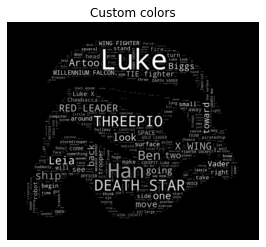

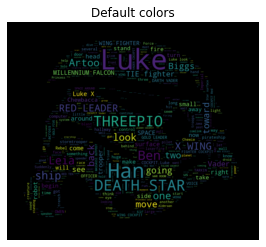

In [12]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = open(path.join(d, 'a_new_hope.txt')).read()

# pre-processing the text a little bit
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

# Image-colored wordcloud with boundary map
A slightly more elaborate version of an image-colored wordcloud that also takes edges in the image into account. Recreating an image similar to the parrot example.


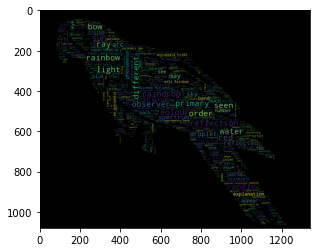

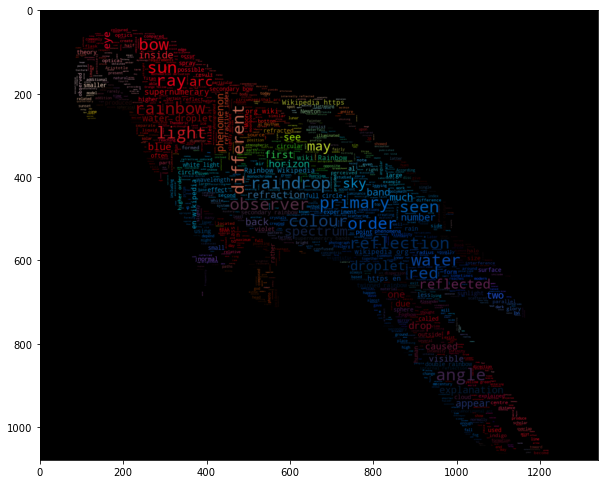

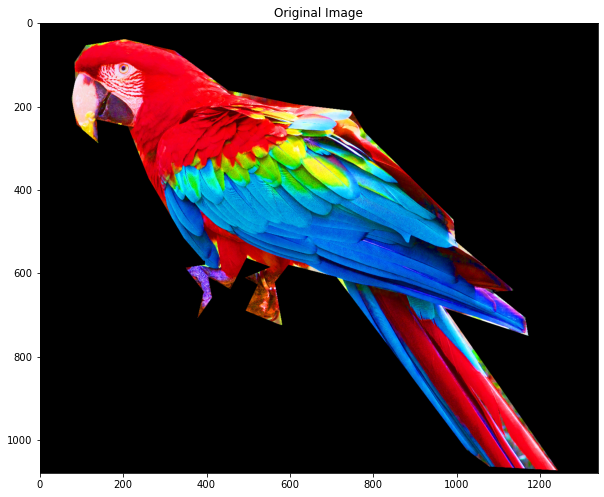

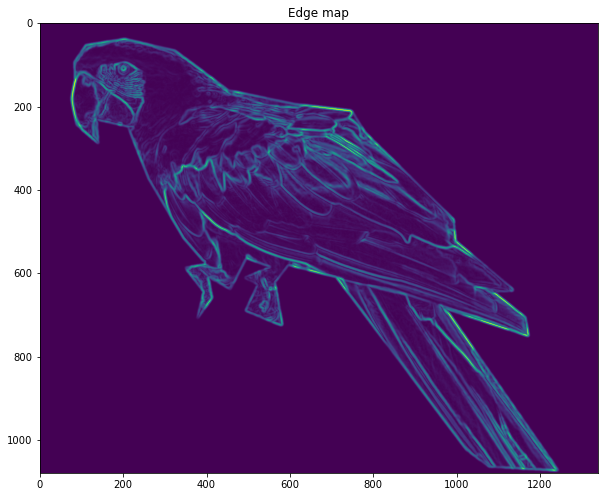

In [13]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = open(os.path.join(d, 'wiki_rainbow.txt'), encoding="utf-8").read()

# load image. This has been modified in gimp to be brighter and have more saturation.
parrot_color = np.array(Image.open(os.path.join(d, "parrot-by-jose-mari-gimenez2.jpg")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
parrot_color = parrot_color[::3, ::3]

# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate(text)
plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("parrot_new.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(parrot_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()

# create wordcloud with chinese
Wordcloud is a very good tool, but if you want to create Chinese wordcloud only wordcloud is not enough. The file shows how to use wordcloud with Chinese. First, you need a Chinese word segmentation library jieba, jieba is now the most elegant the most popular Chinese word segmentation tool in python. You can use ‘PIP install jieba’. To install it. As you can see, at the same time using wordcloud with jieba very convenient

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86137\AppData\Local\Temp\jieba.cache
Loading model cost 0.588 seconds.
Prefix dict has been built successfully.


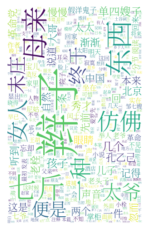

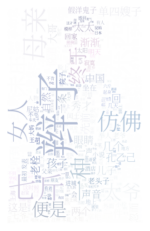

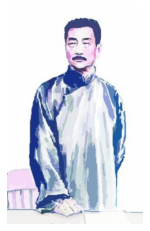

In [14]:
import jieba
# jieba.enable_parallel(4)
# Setting up parallel processes :4 ,but unable to run on Windows
from os import path
from imageio import imread
import matplotlib.pyplot as plt
import os
# jieba.load_userdict("txt\userdict.txt")
# add userdict by load_userdict()
from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

stopwords_path = d + '/wc_cn/stopwords_cn_en.txt'
# Chinese fonts must be set
font_path = d + '/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

# the path to save worldcloud
imgname1 = d + '/wc_cn/LuXun.jpg'
imgname2 = d + '/wc_cn/LuXun_colored.jpg'
# read the mask / color image taken from
back_coloring = imread(path.join(d, d + '/wc_cn/LuXun_color.jpg'))

# Read the whole text.
text = open(path.join(d, d + '/wc_cn/CalltoArms.txt'),encoding='utf-8').read()

# if you want use wordCloud,you need it
# add userdict by add_word()
userdict_list = ['阿Ｑ', '孔乙己', '单四嫂子']


# The function for processing text with Jieba
def jieba_processing_txt(text):
    for word in userdict_list:
        jieba.add_word(word)

    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/ ".join(seg_list)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)


wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=back_coloring,
               max_font_size=100, random_state=42, width=1000, height=860, margin=2,)


wc.generate(jieba_processing_txt(text))

# create coloring from image
image_colors_default = ImageColorGenerator(back_coloring)

plt.figure()
# recolor wordcloud and show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# save wordcloud
wc.to_file(path.join(d, imgname1))

# create coloring from image
image_colors_byImg = ImageColorGenerator(back_coloring)

# show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors_byImg), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(back_coloring, interpolation="bilinear")
plt.axis("off")
plt.show()

# save wordcloud
wc.to_file(path.join(d, imgname2))

# Colored by Group Example
Generating a word cloud that assigns colors to words based on a predefined mapping from colors to words

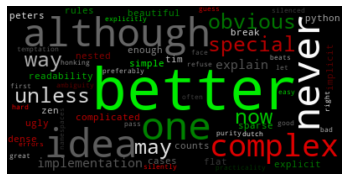

In [15]:
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


text = """The Zen of Python, by Tim Peters
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(collocations=False).generate(text.lower())

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['beautiful', 'explicit', 'simple', 'sparse',
                'readability', 'rules', 'practicality',
                'explicitly', 'one', 'now', 'easy', 'obvious', 'better'],
    # will be colored with a red single color function
    'red': ['ugly', 'implicit', 'complex', 'complicated', 'nested',
            'dense', 'special', 'errors', 'silently', 'ambiguity',
            'guess', 'hard']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()